<a href="https://colab.research.google.com/github/sebas12822/Potcastchannel/blob/main/final_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

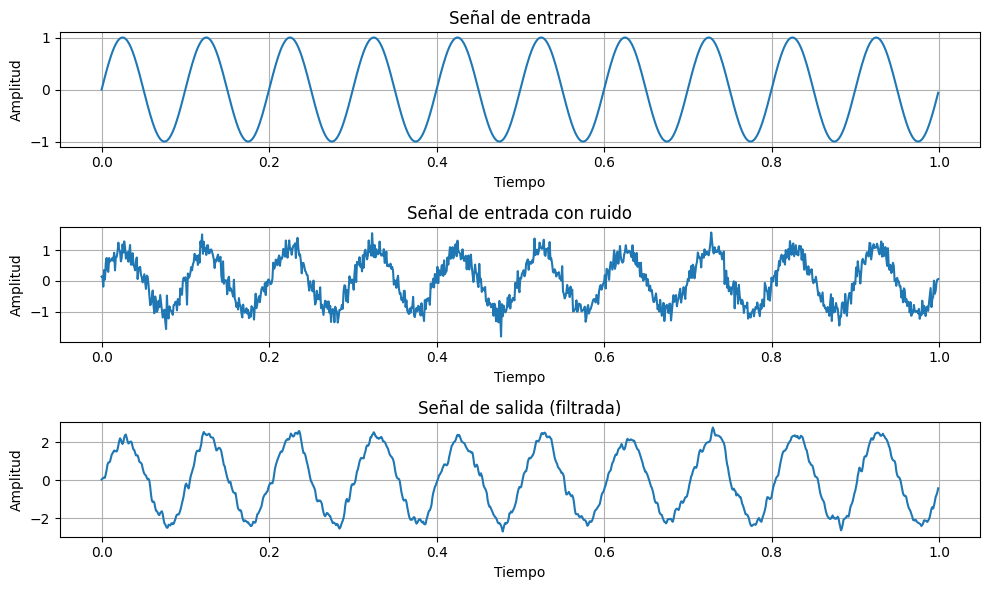

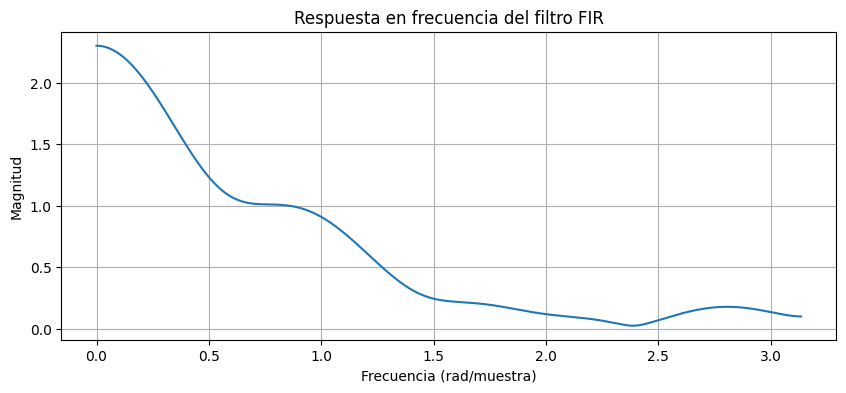

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Parámetros de la simulación
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo
f_signal = 10  # Frecuencia de la señal de entrada (Hz)
noise_std = 0.2  # Desviación estándar del ruido gaussiano

# Generar señal de entrada
input_signal = np.sin(2 * np.pi * f_signal * t)

# Generar ruido gaussiano
noise = np.random.normal(0, noise_std, len(t))

# Agregar ruido a la señal de entrada
noisy_input_signal = input_signal + noise

# Definir los coeficientes del filtro FIR
filter_coeffs = np.array([0.2, 0.4, 0.6, 0.4, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1])

# Aplicar el filtro FIR a la señal de entrada con ruido
output_signal = lfilter(filter_coeffs, 1, noisy_input_signal)

# Calcular la respuesta en frecuencia del filtro FIR
w, h = freqz(filter_coeffs)

# Graficar las señales de entrada y salida con ruido
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, input_signal)
plt.title('Señal de entrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, noisy_input_signal)
plt.title('Señal de entrada con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, output_signal)
plt.title('Señal de salida (filtrada)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficar la respuesta en frecuencia del filtro FIR
plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(h))
plt.title('Respuesta en frecuencia del filtro FIR')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-3-54996bc31446>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_data = wavfile.read(filename)


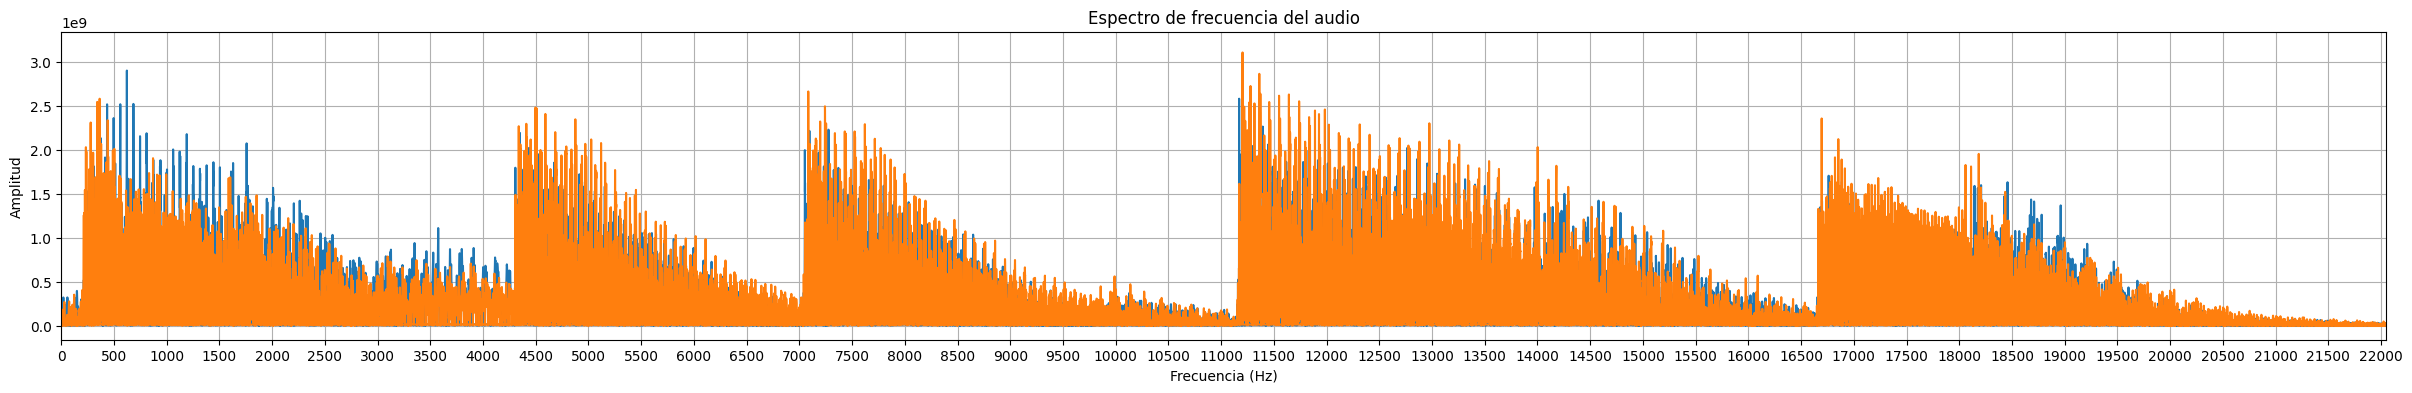

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar el archivo de audio
filename = '90_Fm_Piano_VKeys_01_268_2.wav'
fs, audio_data = wavfile.read(filename)

# Obtener la señal de audio en el dominio de la frecuencia
audio_freq = np.fft.fft(audio_data)

# Calcular las frecuencias correspondientes
freqs = np.fft.fftfreq(len(audio_data), 1/fs)

# Graficar el espectro de frecuencia
plt.figure(figsize=(30, 4))
plt.plot(freqs, np.abs(audio_freq))
plt.title('Espectro de frecuencia del audio')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Limitar el rango de visualización de frecuencias
plt.xlim(0, fs/2)  # Mostrar solo hasta la frecuencia de Nyquist

# Etiquetas de frecuencias en el eje x
plt.xticks(np.arange(0, fs/2, 500))  # Cada 1000 Hz

plt.show()


<ipython-input-4-2b15c4a4a988>:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_audio, audio_data = read(filename)  # Cargar el archivo de audio


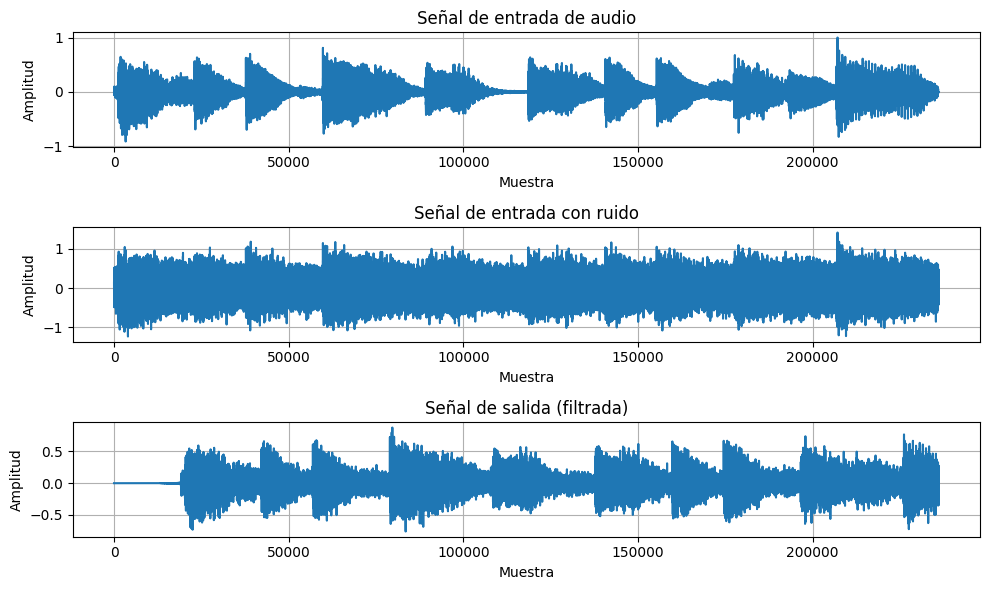

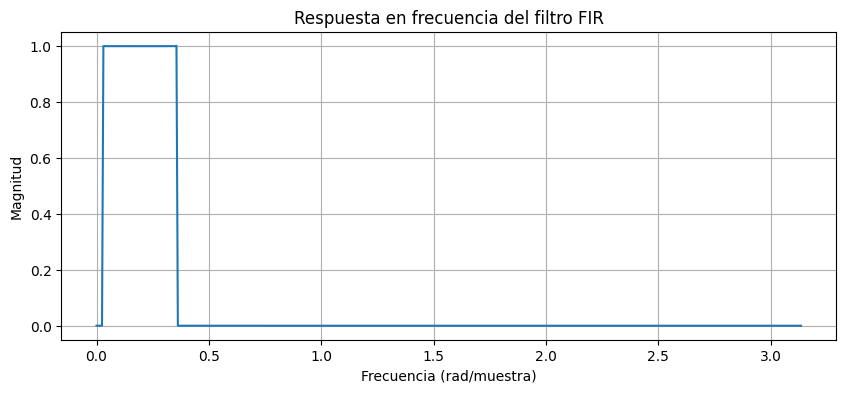

Señal de entrada de audio:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, firwin
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal

# Parámetros de la simulación
noise_std = 0.2  # Desviación estándar del ruido gaussiano

# Cargar el archivo de audio
filename = '90_Fm_Piano_VKeys_01_268_2.wav'  # Ruta del archivo de audio
fs_audio, audio_data = read(filename)  # Cargar el archivo de audio

# Convertir a mono si la señal es estéreo
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Normalizar la señal de entrada entre -1 y 1
input_signal = audio_data.astype(np.float32) / np.max(np.abs(audio_data))

# Generar ruido gaussiano
noise = np.random.normal(0, noise_std, len(input_signal))

# Agregar ruido a la señal de entrada
noisy_input_signal = input_signal + noise

# Parámetros del filtro
f_low = 200  # Frecuencia de corte inferior (Hz)
f_high = 2500  # Frecuencia de corte superior (Hz)
ripple = 0.2/100  # Ripple máximo permitido (porcentaje)
Bw = f_high - f_low  # Ancho de banda (Hz)

# Calcular la longitud del filtro
N = int(np.ceil((4 / ripple) * (fs / Bw)))

# Diseñar los coeficientes del filtro FIR utilizando ventana de Hamming
filter_coeffs = firwin(N, [f_low, f_high], fs=fs, pass_zero=False, window='hamming')

# Aplicar el filtro FIR a la señal de entrada con ruido
output_signal = lfilter(filter_coeffs, 1, noisy_input_signal)

# Calcular la respuesta en frecuencia del filtro FIR
w, h = freqz(filter_coeffs)

# Graficar las señales de entrada y salida con ruido
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(input_signal)
plt.title('Señal de entrada de audio')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(noisy_input_signal)
plt.title('Señal de entrada con ruido')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(output_signal)
plt.title('Señal de salida (filtrada)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficar la respuesta en frecuencia del filtro FIR
plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(h))
plt.title('Respuesta en frecuencia del filtro FIR')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Reproducir la señal de entrada original
print("Señal de entrada de audio:")
Audio(input_signal, rate=fs_audio)

In [ ]:
# Reproducir la señal de entrada con ruido
print("Señal de entrada con ruido:")
Audio(noisy_input_signal, rate=fs_audio)

Señal de entrada con ruido:


In [ ]:
# Reproducir la señal de salida filtrada
print("Señal de salida (filtrada):")
Audio(output_signal, rate=fs_audio)

Señal de salida (filtrada):
